# Getting a test dataframe of an annotation

In [1]:
import matplotlib.pyplot as plt
from annotation_parser import parseAnnotation
from output_representations import bass, inversion
dfa = parseAnnotation("When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op002_No1/1/analysis.txt")

In [5]:
dfa

,measure,duration,isOnset,pitchNames,bass,root,inversion,quality,pcset,localKey,tonicizedKey,degree
offset,,,,,,,,,,,,
0.00,0.0,1.0,True,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1
0.25,0.0,1.0,False,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1
0.50,0.0,1.0,False,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1
0.75,0.0,1.0,False,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1
1.00,1.0,4.0,True,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...
607.75,152.0,4.0,False,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,A-,1
608.00,152.0,4.0,False,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,A-,1
608.25,152.0,4.0,False,"(F, A-, C)",F,F,0.0,minor triad,"(0, 5, 8)",f,A-,1


In [16]:
b = inversion(dfa)

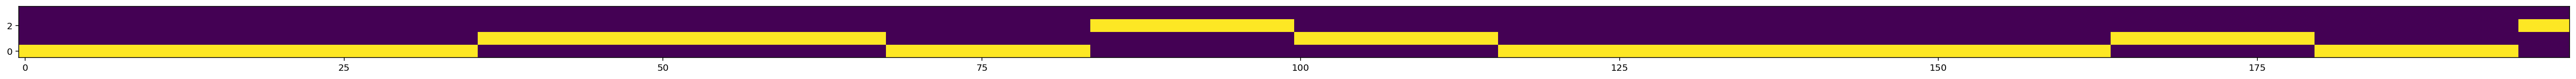

In [22]:
fig, ax = plt.subplots(figsize=(50, 50))
plt.imshow(b[:200].T, origin="lower")

# Getting a test dataframe of a score

In [8]:
import matplotlib.pyplot as plt
from score_parser import parseScore
from input_representations import pitchClassNoteName
dfs = parseScore("beethoven-piano-sonatas/kern/sonata01-1.krn")

In [10]:
dfs

,duration,measure,notes,isOnset
offset,,,,
0.00,1.0,0.0,[C4],[True]
0.25,1.0,0.0,[C4],[False]
0.50,1.0,0.0,[C4],[False]
0.75,1.0,0.0,[C4],[False]
1.00,1.0,1.0,[F4],[True]
...,...,...,...,...
604.75,1.0,151.0,"[C3, E3, G3, C4, E4, G4, B-4, C5, E5]","[False, False, False, False, False, False, Fal..."
605.00,1.0,152.0,"[F2, A-2, C3, F3, F4, A-4, C5, F5]","[True, True, True, True, True, True, True, True]"
605.25,1.0,152.0,"[F2, A-2, C3, F3, F4, A-4, C5, F5]","[False, False, False, False, False, False, Fal..."


In [11]:
pr = pitchClassNoteName(dfs)

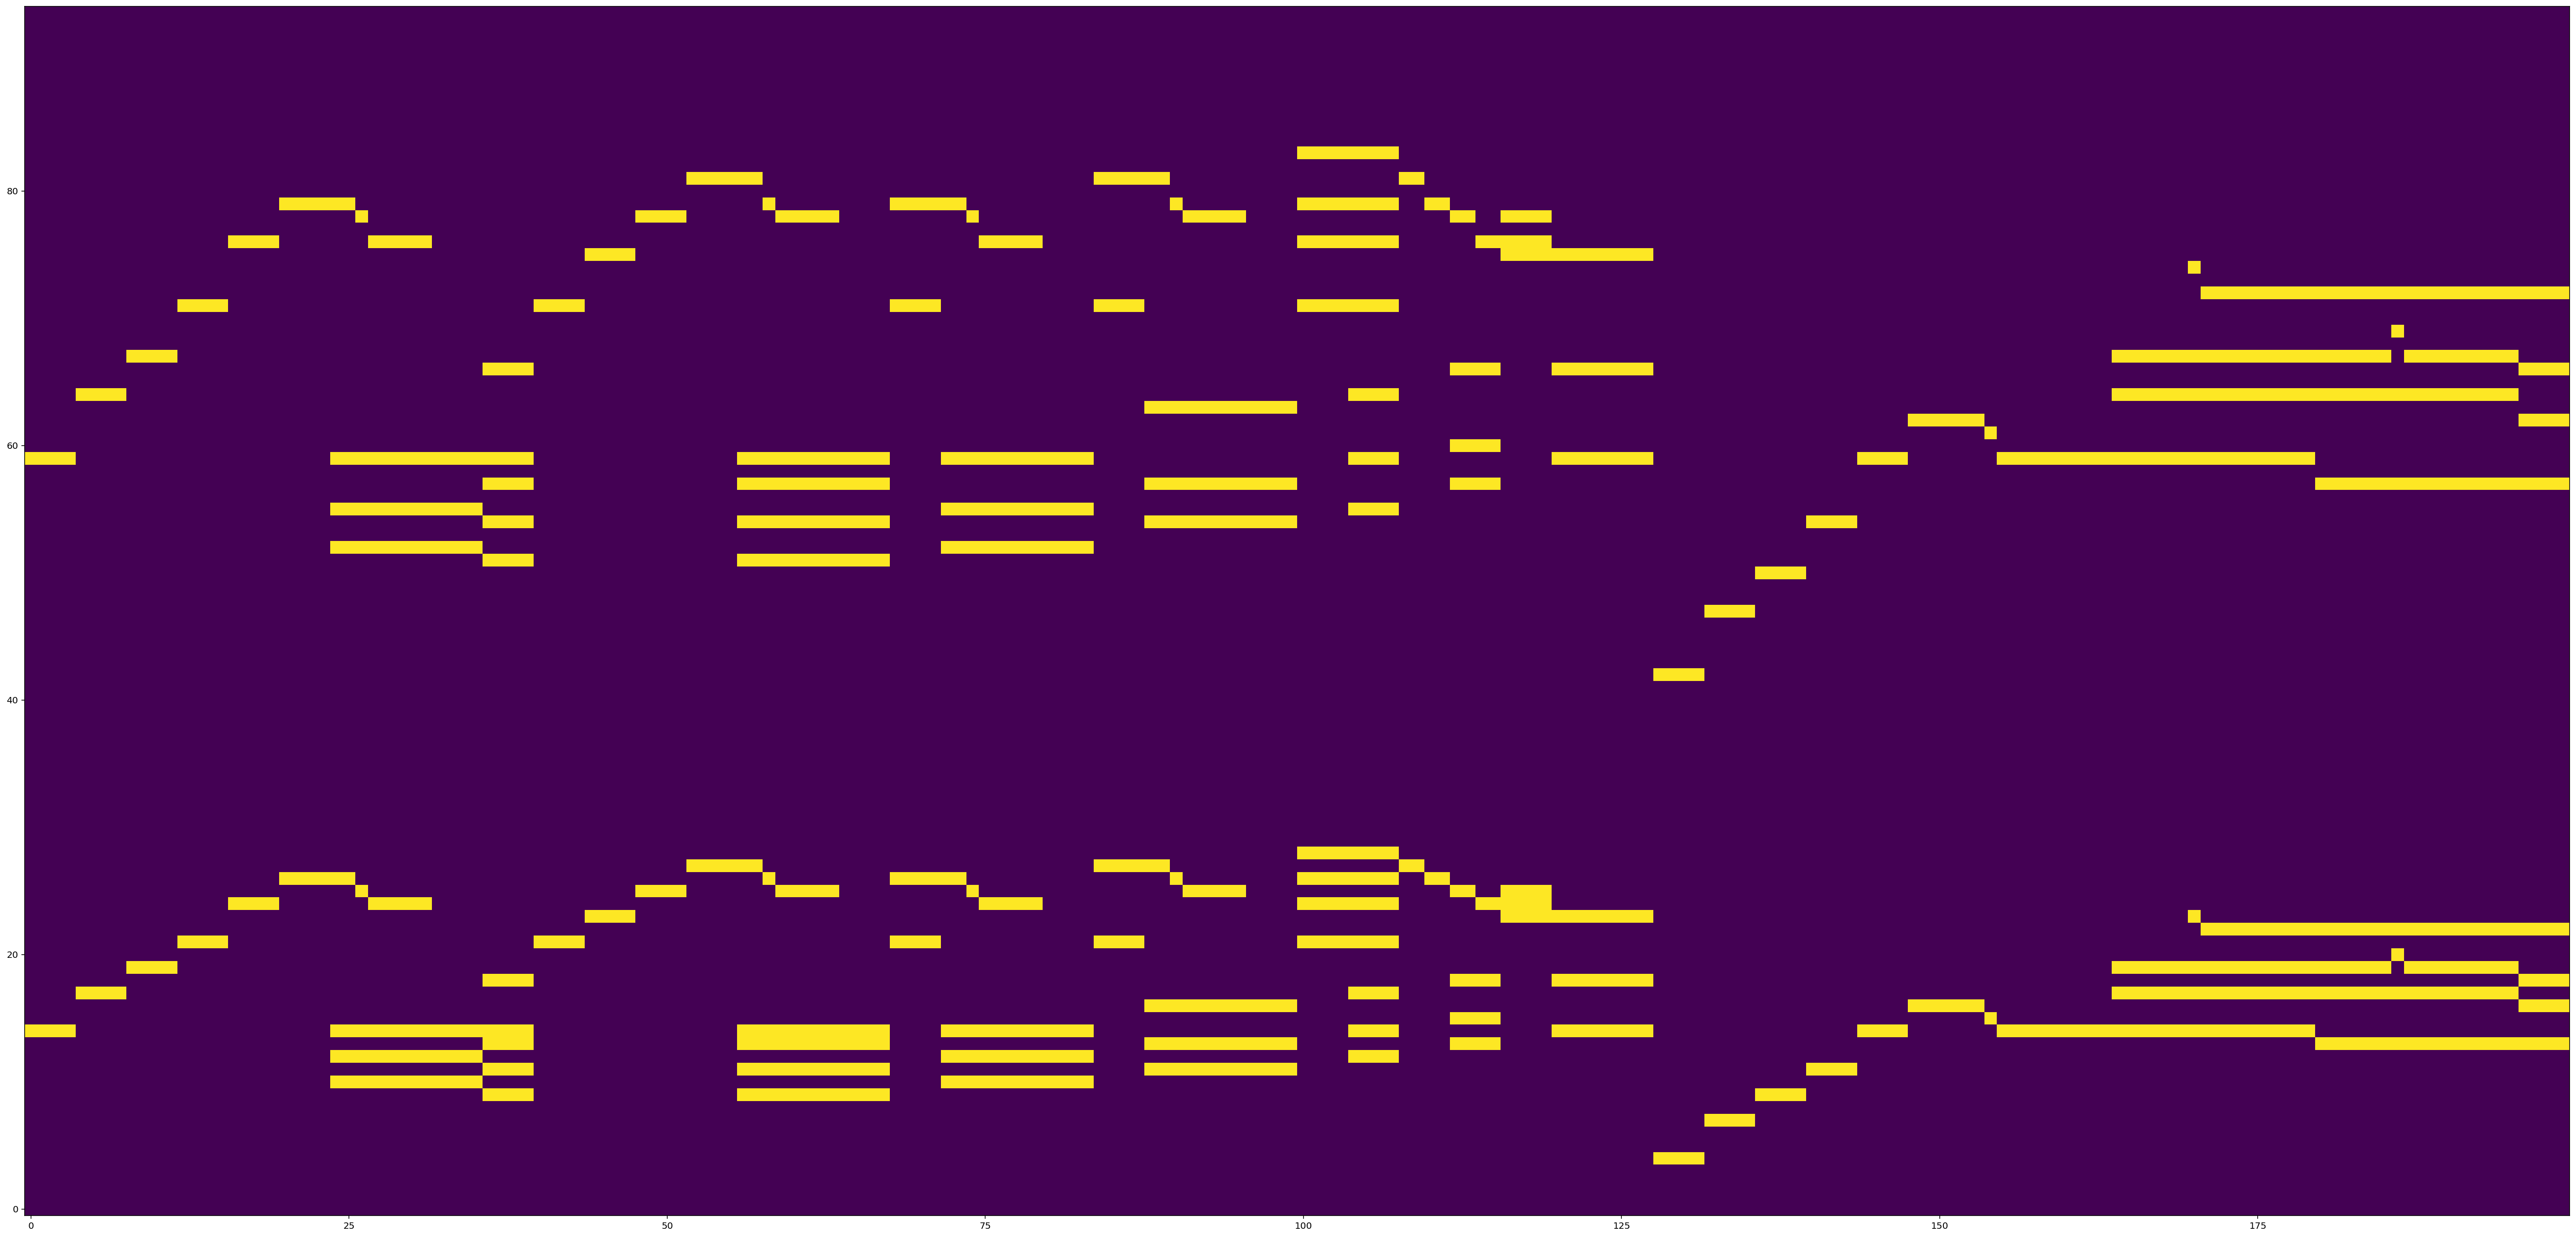

In [21]:
fig, ax = plt.subplots(figsize=(50, 50))
plt.imshow(pr[:200].T, origin="lower")

# Processing all analysis.txt files in When-in-Rome as both, scores and annotation files

Here, we check that all the RomanText files can be processed as both, a score (X) and an annotation (y).

The result should be that:
- No score crashes the code
- All the scores output the same number of rows whether they were parsed as a score or an annotation

In [5]:
from score_parser import parseScore
from annotation_parser import parseAnnotation
import os

for root, _, files in os.walk("When-in-Rome/Corpus"):
    if files and 'analysis.txt' in files:
        filepath = os.path.join(root, 'analysis.txt')
        dfa = parseAnnotation(filepath)
        dfs = parseScore(filepath)
        dfalen = len(dfa.index)
        dfslen = len(dfs.index)
        print(filepath, dfalen, dfslen)
        if dfalen != dfslen:
            print("\tWARNING")

When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op106(Hammerklavier)/1/analysis.txt 6514 6514
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op028(Pastorale)/1/analysis.txt 5520 5520
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op002_No1/1/analysis.txt 2436 2436
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op027_No2(Moonlight)/1/analysis.txt 1056 1056
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op014_No2/1/analysis.txt 1611 1611
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op049_No1/1/analysis.txt 874 874
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op090/1/analysis.txt 2944 2944
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op081a(Les_Adieux)/1/analysis.txt 3984 3984
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op079(Sonatina)/1/analysis.txt 2448 2448
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/Op111/1/analysis.txt 2529 2529
When-in-Rome/Corpus/Piano_Sonatas/Beethoven,_Ludwig_van/

No warnings. That's good news.